# Mathematical Statistics - Recitation 3

### 16th February 2018

## Bayesian estimation

From Wasserman page 176

1. We choose a probability density $f(\theta)$ - called the **prior distribution** - that expresses our beliefs about a parameter $\theta$ before we see any data. *The prior terminology is a **probability distribution** that would express one's beliefs about this quantity before some evidence is taken into account.*

2. We choose a statistical model $f(x|\theta)$ that reflects our beliefs about $x$ given $\theta$. We write this is as $f(x|\theta)$.

3. After observing data $X_1, X_2,..., X_n$, we update our beliefs and calculate the **posterior distribution** $f(\theta$|  $X_1, X_2,..., X_n$). The *posterior distribution* is the distribution of possible unobserved values conditional on the observed values.

Important result - equation (11.2) from Wasserman, page 177

Note: $x^n$ and $X^n$ are shorthand for $x_1, x_2,..., x_n$ and $X_1, X_2,..., X_n$ respectively.

$f(\theta$,  $x^n$) = $\frac{f(x^n|\theta)f(\theta)}{\int f(x^n|\theta)f(\theta) d \theta}$ = $\frac{\mathcal{L}_n(\theta) f(\theta)}{c_n}$ where $c_n = \int  \mathcal{L}_n(\theta)f(\theta) d\theta$

Also, recall $\mathcal{L}_n(\theta)$ is the likelihood function.

In [2]:
# Package imports
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

### Example W 11.12.2

$X_1, X_2,..., X_n$ ~ Normal($\mu, 1$)

*Part (a)*

In [3]:
numberOfObs = 100

mu = 5
sigma = 1

## set random seed for repeatability
np.random.seed(999)


xObs = np.random.normal(mu, sigma, numberOfObs)
xObs[0:5]

array([ 5.12715784,  6.40189088,  5.31481499,  4.14155084,  4.73386556])

*Part (b)*

Analytically determine the likelihood function:

Using improper prior result on Wasserman page 182, $\mu$ | $X^n$ ~ $N(\bar{X}, \frac{1}{n})$ 

$n = 100$

Therefore,

$f(\mu | X^n )={\sqrt {\frac {100}{2\pi}}}e^{-{\frac {100(\mu-\bar{x} )^{2}}{2}}}$


In [4]:
#sample mean of the total 100 observations
mX = xObs.mean()
mX

5.1896087655658816

In [7]:
muPlot = np.linspace(4.65,5.75,100)
densityPlot = 10/np.sqrt(np.pi)*np.exp(-0.5 * (100 * (muPlot - mX) ** 2))

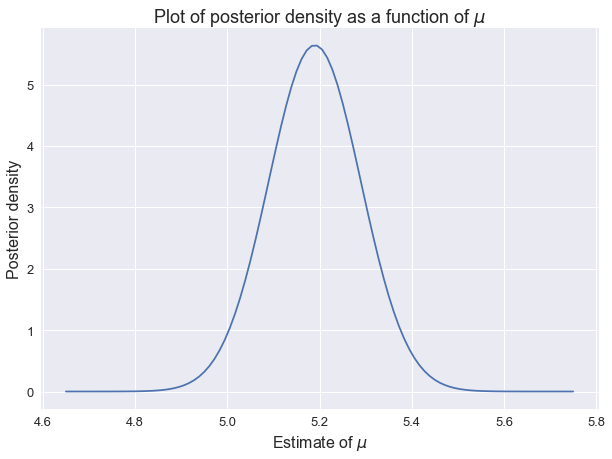

In [8]:
plt.figure(figsize=(10,7))
plt.title('Plot of posterior density as a function of $\mu$', fontsize = 18)
plt.xlabel('Estimate of $\mu$', fontsize = 16)
plt.ylabel('Posterior density', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);
plt.plot(muPlot, densityPlot);

**Figure 1:** Probability density function of the posterior distribution.

Note, the center of the distribution whilst close to 5, is not 5.

*Part (c)*

Using part (b) above, we found posterior distribution: 

$\mu$ | $X^n$ ~ $N(\bar{X}, \frac{1}{n}) = N(\bar{X}, \frac{1}{100})$


In [12]:
1 / numberOfObs

0

In [15]:
#Simulate 1,000 observations from the posterior distribution

samplingObs = 1000
posteriorObs = np.random.normal(mX, np.sqrt(1. / numberOfObs), samplingObs)
posteriorObs[0:5]

array([ 5.22934348,  5.43595514,  5.04889606,  5.29317606,  5.29266639])

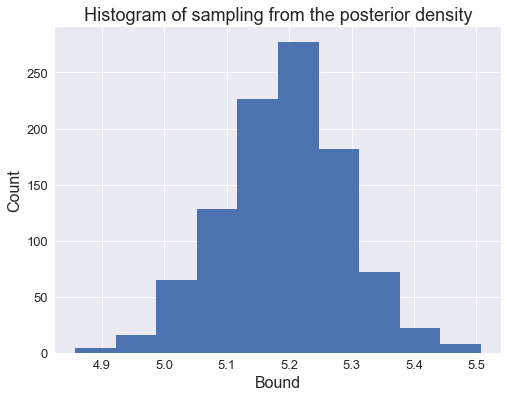

In [16]:
# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(posteriorObs);
plt.title('Histogram of sampling from the posterior density', fontsize = 18)
plt.xlabel('Bound', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);


**Figure 2:** Histogram of randomly drawn observations from the posterior distribution.

The histogram above appears to have  very similar shape to the analytical density plotted above. This intuitively is as we would expect, as we sampled from the posterior distribution.

*Part (d)*

Suppose $\theta = e^{\mu}$, then

$H(\theta, x^n) = P(g(\mu) \leq \theta | x^n) = P(e^{\mu} \leq \theta | x^n) = P(\mu \leq log(\theta) | x^n)$

Therefore,

$H(\theta, x^n)$ = $\int_{-\infty}^{log(\theta)}{{\sqrt {\frac {100}{2\pi}}}e^{-{\frac {100(\mu-\bar{x} )^{2}}{2}}}} d\mu$


In [17]:
# via simulation
posteriorThetaObs = np.exp(posteriorObs)

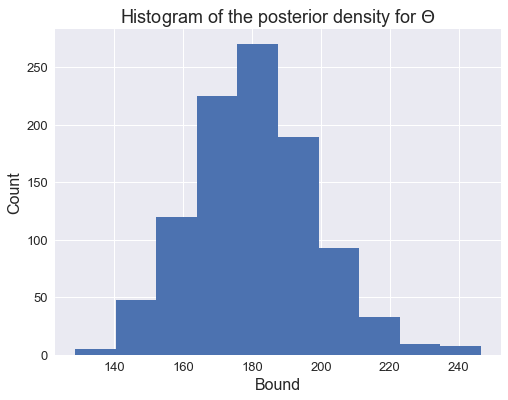

In [19]:
# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(posteriorThetaObs);
plt.title('Histogram of the posterior density for $\Theta$', fontsize = 18)
plt.xlabel('Bound', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);


*Part (e) and (f)*

In [20]:
#Sort the two samplings from the posterior distributions
sortPostObs = np.sort(posteriorObs)
sortPostThetaObs = np.sort(posteriorThetaObs)


In [23]:
# 95% CI bounds
muLower = round(sortPostObs[25],2)
muUpper = round(sortPostObs[975],2)

thetaLower = round(sortPostThetaObs[25],2)
thetaUpper = round(sortPostThetaObs[975],2)

print("The 95% confidence interval for MU is between {} and {}".format(muLower, muUpper))
print("The 95% confidence interval for THETA is between {} and {}".format(thetaLower, thetaUpper))

The 95% confidence interval for MU is between 5.0 and 5.39
The 95% confidence interval for THETA is between 148.79 and 219.27


### Example CB 7.26

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/Question%207.26.png "Title")